## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
cd=pd.merge(mouse_metadata, study_results)
# Display the data table for preview
cd.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [39]:
# Checking the number of mice.
# mc=cd['Mouse ID'].unique()
# mc=pd.DataFrame(mc).count()
# mc
mc=cd['Mouse ID'].unique()
mc=len(mc)
print(f' The totel number of mice tested in this experiment is {mc}')

 The totel number of mice tested in this experiment is 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
cd_df=pd.DataFrame(cd,columns=['Mouse ID', 'Timepoint'])
# cd_dup=cd_df[cd_df.duplicated(subset=['Mouse ID','Timepoint'])]
cd_dup=cd_df[cd_df.duplicated()]
cd_dup


,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cd1=pd.DataFrame(cd)
cd1=cd1.drop_duplicates(subset=['Mouse ID','Timepoint'])
cd1=pd.DataFrame(cd1)
cd2=cd1['Mouse ID'].unique()


In [43]:
# Checking the number of mice in the clean DataFrame.
cd2=len(cd2)
cd2
print(f' The totel number of mice tested in this experiment is {cd2}')

 The totel number of mice tested in this experiment is 249


## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
st_df=cd1[['Drug Regimen', 'Tumor Volume (mm3)']]
# st_df=pd.DataFrame(cd.groupby('Drug Regimen'))
mean=pd.DataFrame(st_df.groupby('Drug Regimen').mean()).rename(columns={'Tumor Volume (mm3)':'Mean'})
median=pd.DataFrame(st_df.groupby('Drug Regimen').median().rename(columns={'Tumor Volume (mm3)':'Median'}))
var=pd.DataFrame(st_df.groupby('Drug Regimen').var().rename(columns={'Tumor Volume (mm3)':'Variance'}))
std=pd.DataFrame(st_df.groupby('Drug Regimen').std().rename(columns={'Tumor Volume (mm3)':'Standard Deviation'}))
sem=pd.DataFrame(st_df.groupby('Drug Regimen').sem().rename(columns={'Tumor Volume (mm3)':'SEM'}))
sum_df=pd.merge(mean, median, on=['Drug Regimen'])
sum_df=pd.merge(sum_df, var, on=['Drug Regimen'])
sum_df=pd.merge(sum_df, std, on=['Drug Regimen'])
sum_df=pd.merge(sum_df, sem, on=['Drug Regimen'])
sum_df['Mean']=sum_df['Mean'].map('{:.4}'.format)
sum_df['Median']=sum_df['Median'].map('{:.4}'.format)
sum_df['Variance']=sum_df['Variance'].map('{:.4}'.format)
sum_df['Standard Deviation']=sum_df['Standard Deviation'].map('{:.4}'.format)
sum_df['SEM']=sum_df['SEM'].map('{:.4}'.format)
sum_df
# mean

# This method produces everything in a single groupby function


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.995,0.3293
Ceftamin,52.59,51.78,39.29,6.268,0.4698
Infubinol,52.88,51.82,43.13,6.567,0.4922
Ketapril,55.24,53.7,68.55,8.28,0.6039
Naftisol,54.33,52.51,66.17,8.135,0.5965
Placebo,54.03,52.29,61.17,7.821,0.5813
Propriva,52.39,50.91,43.14,6.568,0.5259
Ramicane,40.22,40.67,23.49,4.846,0.321
Stelasyn,54.23,52.43,59.45,7.71,0.5731


## Bar and Pie Charts

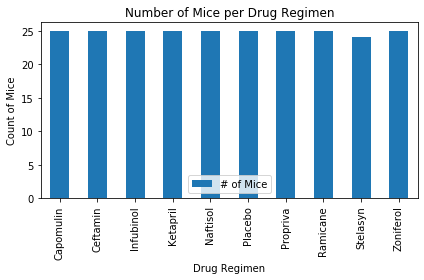

In [45]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# mice=cd['Mouse ID'].drop_duplicates()
mice=cd[['Drug Regimen', 'Mouse ID']].drop_duplicates()
# mice=mice['Mouse ID'].unique()
count=pd.DataFrame(mice.groupby('Drug Regimen').count()).rename(columns={'Mouse ID':'# of Mice'})
mice_bar=count.plot(kind='bar', title='Number of Mice per Drug Regimen')
mice_bar.set_xlabel('Drug Regimen')
mice_bar.set_ylabel('Count of Mice')

mice_bar
plt.tight_layout()

In [46]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice=cd1[['Drug Regimen', 'Mouse ID']]

dr=mice['Drug Regimen'].unique().tolist()
dr


['Ramicane',
 'Capomulin',
 'Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ketapril',
 'Propriva',
 'Naftisol']

In [47]:
mice=cd[['Drug Regimen', 'Mouse ID']].drop_duplicates()
dr_count=pd.DataFrame(mice.groupby('Drug Regimen').count()).rename(columns={'Mouse ID':'# of Mice'})
dr_count=dr_count['# of Mice'].tolist()
# dr_count=dr_count['# of Mice'].unique().tolist()
dr_count

[25, 25, 25, 25, 25, 25, 25, 25, 24, 25]

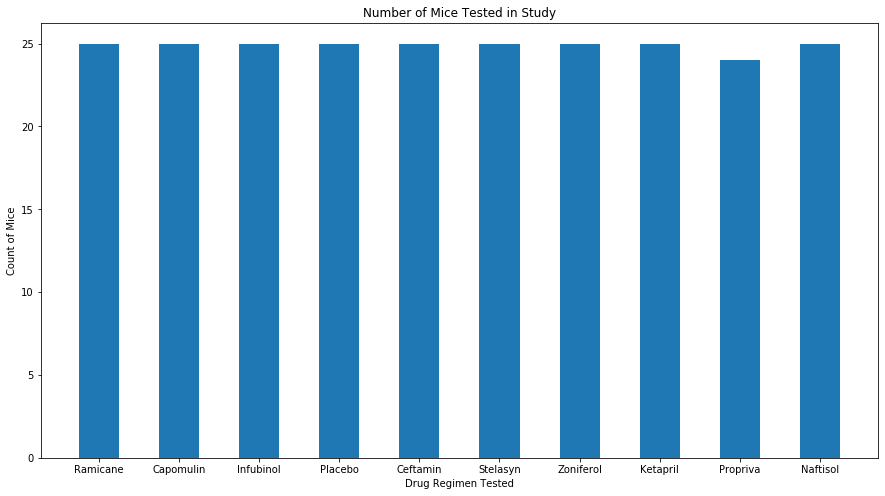

In [48]:
y_pos=np.arange(len(dr))
y_pos
plt.figure(figsize=(15,8))
plt.bar(dr,dr_count, align='center', width=0.5)
plt.xticks(y_pos, dr)
plt.title('Number of Mice Tested in Study')
plt.ylabel('Count of Mice')
plt.xlabel('Drug Regimen Tested')
plt.show()

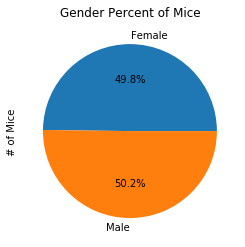

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# mice=cd['Mouse ID'].drop_duplicates()
gender=cd[['Sex', 'Mouse ID']].drop_duplicates()
# mice=mice['Mouse ID'].unique()
count=pd.DataFrame(gender.groupby('Sex').count()).rename(columns={'Mouse ID':'# of Mice'})
mice_bar=count.plot.pie(y='# of Mice', legend=False, autopct='%1.1f%%', title='Gender Percent of Mice')


([<matplotlib.patches.Wedge at 0x2103e1b7788>,
 [Text(0.007254593066618785, 1.1499771175460136, 'Male'),
  Text(-0.006939175976765929, -1.0999781124353174, 'Female')],
 [Text(0.004100422168088878, 0.649987066439051, '49.8%'),
  Text(-0.003785005078235961, -0.5999880613283548, '50.2%')])

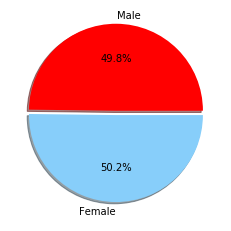

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender=cd[['Sex', 'Mouse ID']].drop_duplicates()
gd=gender['Sex'].unique().tolist()
gd
dd_count=pd.DataFrame(gender.groupby('Sex').count()).rename(columns={'Mouse ID':'# of Mice'})
dd_count=dd_count['# of Mice'].tolist()
dd_count

plt.pie(dd_count, labels=gd, autopct='%1.1f%%', explode=(0.05,0), shadow=True, colors=['red','lightskyblue'])

## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# filter_df=cd1.drop[['Drug Regimen'] != ['Placebo',  'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']]
cap=cd1.loc[(cd1["Drug Regimen"]=='Capomulin')] 
ram=cd1.loc[(cd1["Drug Regimen"]=='Ramicane')] 
inf=cd1.loc[(cd1["Drug Regimen"]=='Infubinol')] 
cef=cd1.loc[(cd1["Drug Regimen"]=='Ceftamin')] 
# filter_df=cap
filter_df=cap.append(ram).append(inf).append(cef)
filter_df.count()
# Start by getting the last (greatest) timepoint for each mouse
last_time=filter_df.loc[filter_df.groupby(['Mouse ID'])['Timepoint'].idxmax()]
last_time
# sort=last_time.sort_values(by=["Timepoint"])
# sort

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
327,a411,Ramicane,Male,3,22,45,38.407618,1
430,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
124,y793,Capomulin,Male,17,17,45,31.896238,2
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
84,z578,Ramicane,Male,11,16,45,30.638696,0


In [52]:
# Put treatments into a list for for loop (and later for plot labels)
dr_list=last_time['Drug Regimen'].unique().tolist()
dr_list
   

['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

In [53]:
# Create empty list to fill with tumor vol data (for plotting)
infub_vol=[]
ceft_vol=[]
ram_vol=[]
cap_vol=[]
dr_len=len(last_time['Drug Regimen'])
dr_len

100

In [54]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles=last_time['Tumor Volume (mm3)'].quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr=upperq-lowerq
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_data=last_time.loc[(last_time['Tumor Volume (mm3)'] < lower_bound) | (last_time['Tumor Volume (mm3)'] > upper_bound)]
outlier_data

The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
The the median of tumor volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [55]:
# Locate the rows which contain mice on each drug and get the tumor volumes
# for i in last_time:
#     if ['Drug Regimen']=='Infubinol':
#         infub_vol.append(['Tumor Volume (mm3)'])
#     print(len(infub_vol))
# infub_vol=[]
# ceft_vol=[]
# ram_vol=[]
# cap_vol=[]
# for _,row in last_time.iterrows():
#         if row['Drug Regimen']=='Infubinol':
#             infub_vol.append(row['Tumor Volume (mm3)'])
#         elif row['Drug Regimen']=='Ceftamin':
#             ceft_vol.append(row['Tumor Volume (mm3)']) 
#         elif row['Drug Regimen']=='Ramicane':
#             ram_vol.append(row['Tumor Volume (mm3)']) 
#         elif row['Drug Regimen']=='Capomulin':
#             cap_vol.append(row['Tumor Volume (mm3)'])    
            
# infub_vol=last_time.loc[last_time['Drug Regimen']=='Infubinol','Tumor Volume (mm3)']
# ceft_vol=last_time.loc[last_time['Drug Regimen']=='Ceftamin','Tumor Volume (mm3)']
# ram_vol=last_time.loc[last_time['Drug Regimen']=='Ramicane','Tumor Volume (mm3)']
# cap_vol=last_time.loc[last_time['Drug Regimen']=='Capomulin','Tumor Volume (mm3)']
drugTypes=dr_list
allValsDict={}
for drugType in drugTypes:
    allValsDict[drugType]=last_time.loc[last_time['Drug Regimen']==drugType,'Tumor Volume (mm3)']
# print(allValsDict)

In [56]:
 # add subset 

In [57]:
 # Determine outliers using upper and lower bounds
outlier_data=last_time.loc[(last_time['Tumor Volume (mm3)'] < lower_bound) | (last_time['Tumor Volume (mm3)'] > upper_bound)]
outlier_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


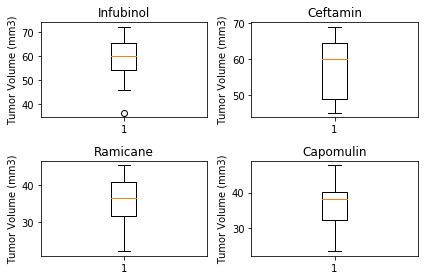

In [58]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
i=1
for key,values in allValsDict.items():
    plt.subplot(2,2,i)
    plt.title(key)
    plt.ylabel('Tumor Volume (mm3)')
    plt.boxplot(values)
    i+=1
plt.tight_layout()

## Line and Scatter Plots

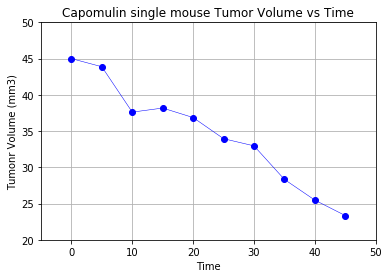

In [59]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_mouse=cd1.loc[(cd1["Mouse ID"]=='s185')] 
x_axis = cap_mouse['Timepoint']
y_axis=cap_mouse['Tumor Volume (mm3)']
plt.title('Capomulin single mouse Tumor Volume vs Time')
plt.grid()
plt.xlim(-5,50)
plt.ylim(20,50)
plt.xlabel('Time')
plt.ylabel('Tumonr Volume (mm3)')
plt.plot(x_axis, y_axis,linewidth=.5, marker="o", color="blue")
# cap.head()

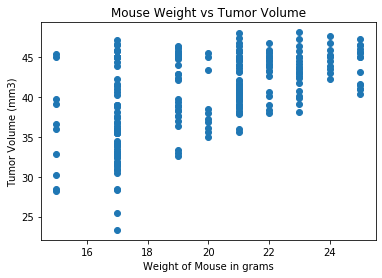

In [60]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap.head()
xvalue=cap['Weight (g)']
yvalue=cap['Tumor Volume (mm3)']
plt.xlabel('Weight of Mouse in grams')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs Tumor Volume')
plt.scatter(xvalue,yvalue)

## Correlation and Regression

 the rsquared value is 0.2763600223455911


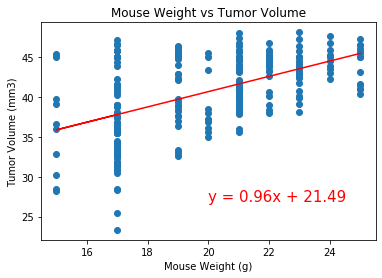

In [61]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
xvalue=cap['Weight (g)']
yvalue=cap['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalue, yvalue)
regress_values = xvalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalue,yvalue)
plt.plot(xvalue,regress_values,"r-")
plt.annotate(line_eq,(20,27),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs Tumor Volume')
print(f" the rsquared value is {rvalue**2}")
plt.show()